In [1]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from scipy.stats import chisquare

from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
df_wine = pd.read_csv("../input/hr-analytics/HR_comma_sep.csv")

In [3]:
df_wine.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [4]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'salary'. 
df_wine['salary']= label_encoder.fit_transform(df_wine['salary']) 
  
df_wine['salary'].unique()

array([1, 2, 0])

In [5]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Department'. 
df_wine['Department']= label_encoder.fit_transform(df_wine['Department']) 
  
df_wine['Department'].unique() 

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

# Training and Test data

In [6]:
from sklearn.model_selection import train_test_split

feature_column_names = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']
predicted_class_name = ['left']

# Getting feature variable values
X = df_wine[feature_column_names].values
y = df_wine[predicted_class_name].values

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [7]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train.ravel())

rf_predict_train = rfc.predict(X_train)

rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9975


In [8]:
rf_predict_test = rfc.predict(X_test)

rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

print ("Confusion Matrix for Random Forest")
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Accuracy: 0.9864
Confusion Matrix for Random Forest
[[1019   53]
 [   8 3420]]

Classification Report

              precision    recall  f1-score   support

           1       0.99      0.95      0.97      1072
           0       0.98      1.00      0.99      3428

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



# cross_val_score Random forest

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


In [10]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [11]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_predict_test))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_predict_test))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
scb = rfc_cv_score.mean()
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[3420    8]
 [  53 1019]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3428
           1       0.99      0.95      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



=== All AUC Scores ===
[0.99994257 0.99949271 0.9824397  0.97115189 0.96932981 0.99540254
 0.99951232 0.9993567  0.99998896 1.        ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9916617191728492


# BaggingClassifier

In [12]:
from sklearn. ensemble import BaggingClassifier

bg = BaggingClassifier(RandomForestClassifier(random_state=42), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators='warn',
                                                        n_jobs=None,
    

In [13]:
train_a = bg.score(X_train,y_train)
print(train_a)

0.9882845985331936


In [14]:
test_a = bg.score(X_test,y_test)
print(test_a)

0.9766666666666667


# Another Bagging

In [15]:
 from sklearn.ensemble import BaggingClassifier
 
tree = RandomForestClassifier(random_state=42)
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, 
                        max_samples=0.7, bootstrap=True,
                        max_features=1.0, bootstrap_features=False, 
                        n_jobs=1, random_state=1)

In [16]:

# Bagging
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('[Bagging] auc-train = %.3f, auc-test = %.3f' % (bag_train, bag_test))

[Bagging] auc-train = 0.992, auc-test = 0.980


# AdaBoostClassifier

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# adaboost
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500)
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('[AdaBoost] accuracy-train = %.3f, accuracy-test = %.3f' % 
      (ada_train, ada_test))

[AdaBoost] accuracy-train = 1.000, accuracy-test = 0.986


# DecisionTreeClassifier

In [18]:
#decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  0.9998095056672064
Testing score:  0.978


# cross-validation 

In [19]:
# 10-fold cross-validation 
dt = tree.DecisionTreeClassifier()

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
print(scores)

[0.98334444 0.98133333 0.97133333 0.96666667 0.96466667 0.98333333
 0.98733333 0.99       0.99933289 1.        ]


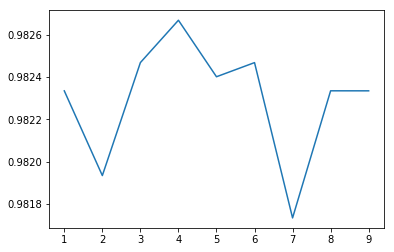

KNN with N-Fold Cross Validation is giving best score as 98.26677769782712% for K=4


In [20]:
k_range=np.arange(1,10,1)
k_score=[]
best_accuracy_score_dt=0
best_k=0
for k in k_range:
    score=cross_val_score(tree.DecisionTreeClassifier(), X, y.ravel(), cv=10, scoring='accuracy').mean()
    k_score.append(score)
    if best_accuracy_score_dt<score:
        best_accuracy_score_dt=score
        best_k=k
knn_plot=plt
knn_plot.plot(k_range, k_score)
knn_plot.show()
print(f"KNN with N-Fold Cross Validation is giving best score as {best_accuracy_score_dt*100}% for K={best_k}")

# BaggingClassifier

In [21]:
 from sklearn.ensemble import BaggingClassifier

tree = tree.DecisionTreeClassifier()
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, 
                        max_samples=0.7, bootstrap=True,
                        max_features=1.0, bootstrap_features=False, 
                        n_jobs=1, random_state=1)

In [22]:

# Bagging
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('[Bagging] auc-train = %.3f, auc-test = %.3f' % (bag_train, bag_test))

[Bagging] auc-train = 0.998, auc-test = 0.986


# AdaBoostClassifier

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets




# adaboost
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500)
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('[AdaBoost] accuracy-train = %.3f, accuracy-test = %.3f' % 
      (ada_train, ada_test))

[AdaBoost] accuracy-train = 1.000, accuracy-test = 0.987


In [24]:
from sklearn. ensemble import BaggingClassifier

bg = BaggingClassifier(tree, max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [25]:
bg.score(X_train,y_train)

0.9928564625202401

In [26]:
bg.score(X_test,y_test)

0.9826666666666667

# KNeighborsClassifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_accuracy = knn.score(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))
knn_accuracy_testdata = knn.score(X_test, y_test)
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.9638060767692161
Test accuracy: 0.9464444444444444


In [29]:
from sklearn.model_selection import cross_val_score


# KNeighborsClassifier cross validation

In [30]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.9526982  0.946      0.95133333 0.944      0.94533333 0.94466667
 0.948      0.94733333 0.96130754 0.95997332]


In [31]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())

0.9500645721768469


In [32]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 11)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)


[0.9721347545487797, 0.9726007545188539, 0.9608656854514157, 0.9553313285028127, 0.9500645721768469, 0.9583980397620918, 0.9544644390508618, 0.9557978613916422, 0.9512639496580517, 0.9529307943988716]


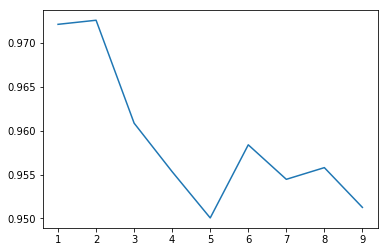

KNN with N-Fold Cross Validation is giving best score as 97.26007545188538% for K=2


In [33]:
k_range=np.arange(1,10,1)
k_score=[]
best_accuracy_score_knn=0
best_k=0
for k in k_range:
    score=cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y.ravel(), cv=10, scoring='accuracy').mean()
    k_score.append(score)
    if best_accuracy_score_knn<score:
        best_accuracy_score_knn=score
        best_k=k
knn_plot=plt
knn_plot.plot(k_range, k_score)
knn_plot.show()
print(f"KNN with N-Fold Cross Validation is giving best score as {best_accuracy_score_knn*100}% for K={best_k}")

In [34]:
 from sklearn.ensemble import BaggingClassifier

knn =  KNeighborsClassifier(n_neighbors=5)
bag1 = BaggingClassifier(base_estimator=tree, n_estimators=500, 
                        max_samples=0.7, bootstrap=True,
                        max_features=1.0, bootstrap_features=False, 
                        n_jobs=1, random_state=1)

In [35]:

# Bagging
bag1 = bag1.fit(X_train, y_train)
y_train_pred = bag1.predict(X_train)
y_test_pred = bag1.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test1 = accuracy_score(y_test, y_test_pred) 
print('[Bagging] auc-train = %.3f, auc-test = %.3f' % (bag_train, bag_test))

[Bagging] auc-train = 0.998, auc-test = 0.986


In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets




# adaboost
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500)
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('[AdaBoost] accuracy-train = %.3f, accuracy-test = %.3f' % 
      (ada_train, ada_test))

[AdaBoost] accuracy-train = 1.000, accuracy-test = 0.983


# another bagging

In [37]:
from sklearn. ensemble import BaggingClassifier

bg = BaggingClassifier(KNeighborsClassifier(n_neighbors=5), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.5, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [38]:
bg.score(X_train,y_train)

0.9535193827983618

In [39]:
bg.score(X_test,y_test)

0.9415555555555556

In [40]:
#Model comparison
models = pd.DataFrame({
        'Model'          : [ 'kNN' , 'Decision Tree', 'Random Forest'],
        'Training_Score' : [ knn_accuracy, dt_score_train, rf_accuracy],
        'Testing_Score'  : [ knn_accuracy_testdata, dt_score_test, rf_accuracy_testdata],
        'Cross validation Sc' :[best_accuracy_score_knn,best_accuracy_score_dt,rfc_cv_score.mean()],
        'Bagging Score' : [bag_test1,bag_test,test_a]
})
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score,Cross validation Sc,Bagging Score
2,Random Forest,0.997524,0.986444,0.991662,0.976667
1,Decision Tree,0.999810,0.978000,0.982668,0.986444
0,kNN,0.963806,0.946444,0.972601,0.986444
